In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook   
import numpy as np
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
warnings.filterwarnings("ignore")                                                                             


In [3]:
data = pd.ExcelFile(r"C:\Users\Muhammed\Documents\KPMG data.xlsx")

In [4]:
CustomerDemographic = pd.read_excel(data, 'CustomerDemographic',header = 1, index_col= None)

In [5]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [6]:
df = CustomerDemographic

In [7]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [8]:
CustomerDemographic = CustomerDemographic.drop('default', axis=1)

In [9]:
#Re-naming the categories
CustomerDemographic['gender'] = CustomerDemographic['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')

In [10]:
CustomerDemographic['gender'].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

In [11]:
df = CustomerDemographic

In [12]:
df['gender'].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

[2039, 1873, 88]


([<matplotlib.axis.XTick at 0x1c5f9190ad0>,
 [Text(0, 0, 'Female'),
  Text(1, 0, "F's P"),
  Text(2, 0, 'Male'),
  Text(3, 0, "M's P"),
  Text(4, 0, 'Unknown'),
  Text(5, 0, "U's P")])

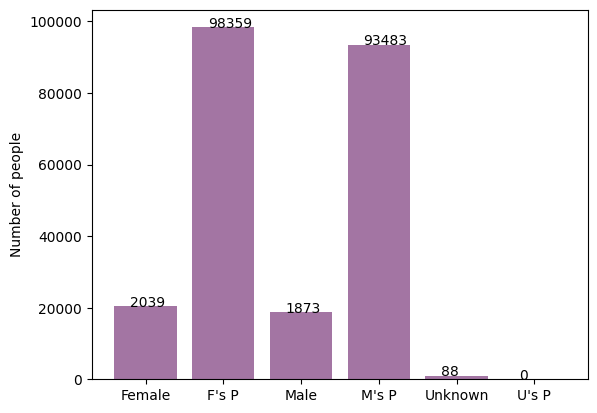

In [13]:
gender = [0,0,0] #first is Female, second if Male, third is Unknown
for each in df['gender']:
    if each[0] == "F":
        gender[0] += 1
    elif each[0] == "M":
        gender[1] += 1
    else:
        gender[2] += 1

print(gender)
def gf(x, pos):
    #'The two args are the value and gender'
    return int(x)

bike = [0,0,0]
bike[0] += df['past_3_years_bike_related_purchases'][df['gender'] == 'Female'].sum() + df['past_3_years_bike_related_purchases'][df['gender'] == 'F'].sum()
bike[1] += df['past_3_years_bike_related_purchases'][df['gender'] == 'Male'].sum() + df['past_3_years_bike_related_purchases'][df['gender'] == 'M'].sum()
bike[2] += df['past_3_years_bike_related_purchases'][df['gender'] == 'U'].sum()

grapho = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graphl = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]
colorr = (0.4,0.1,0.4,0.6)
#scale up gender by 10 for easier visualization
formatter = FuncFormatter(gf)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graphl, color = colorr)
for i in range(len(gender*2)):
    plt.text(x = i-0.2, y = graphl[i]+0.1, s = grapho[i], size = 10)
plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))

([<matplotlib.axis.XTick at 0x1c5f8c78350>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Unspecified')])

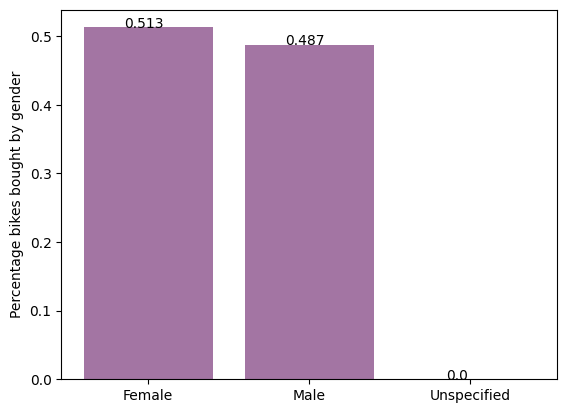

In [14]:
avg  = [0,0,0]
ss   = sum(bike)
for i in range(len(avg)):
    avg[i] += round(bike[i]/ss,3) 

x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes bought by gender')
plt.bar(x1, avg, color = colorr)
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'Unspecified'))

In [15]:

# Convert 'DOB' to datetime format and handle any errors
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

# Calculate age
df['age'] = (datetime.datetime.now() - df['DOB']).dt.days / 365.25

# Drop any null values in 'age'
df['age'].dropna(inplace=True)

# Define age ranges
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create age range column
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Create histogram
plt.figure(figsize=(10,6))
df['age_range'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age Range')
plt.ylabel('Number of Customers')

# Save histogram
plt.savefig('C:/Users/Muhammed/Downloads/age-range-distribution.png')
plt.close()

In [16]:
df['gender'].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Convert 'DOB' to datetime format and handle any errors
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

# Calculate age
df['age'] = (datetime.now() - df['DOB']).dt.days / 365.25

# Drop any null values in 'age'
df['age'].dropna(inplace=True)

# Define age ranges
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create age range column
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by gender and age range, and sum bike purchases
df_grouped = df.groupby(['gender', 'age_range'])['past_3_years_bike_related_purchases'].sum().unstack('gender')

# Create bar chart
df_grouped.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Bike Purchases by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Bikes Purchased')

# Save chart
plt.savefig('C:/Users/Muhammed/Downloads/bike-purchases-gender-age-b6d72f.png')
plt.close()

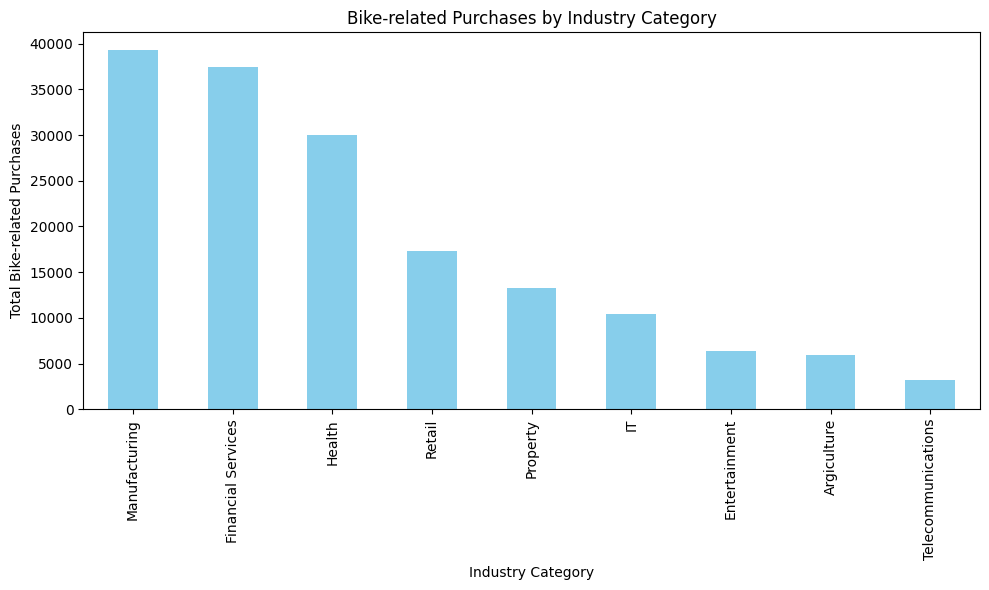

In [19]:

# Grouping the data by job industry category and calculating the total bike-related purchases
grouped_data = df.groupby('job_industry_category')['past_3_years_bike_related_purchases'].sum()

# Sorting the data in descending order
grouped_data = grouped_data.sort_values(ascending=False)

# Creating the bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Bike-related Purchases by Industry Category')
plt.xlabel('Industry Category')
plt.ylabel('Total Bike-related Purchases')
plt.xticks(rotation=90)

# Displaying the chart
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

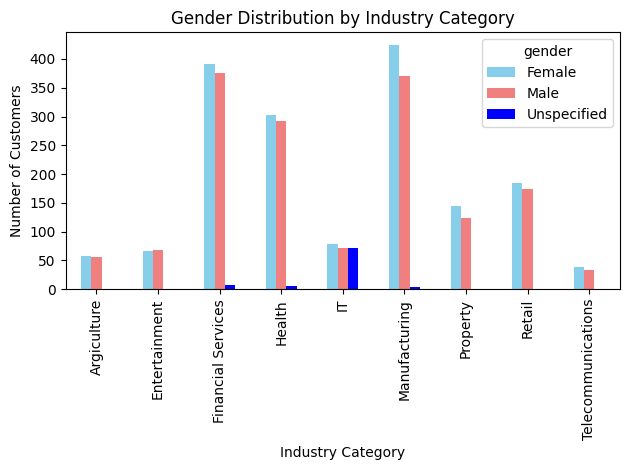

In [20]:
grouped_data = df.groupby(['job_industry_category', 'gender']).size().unstack()

# Creating the stacked bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral','blue'])
plt.title('Gender Distribution by Industry Category')
plt.xlabel('Industry Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)

# Displaying the chart
plt.tight_layout()
plt.show()

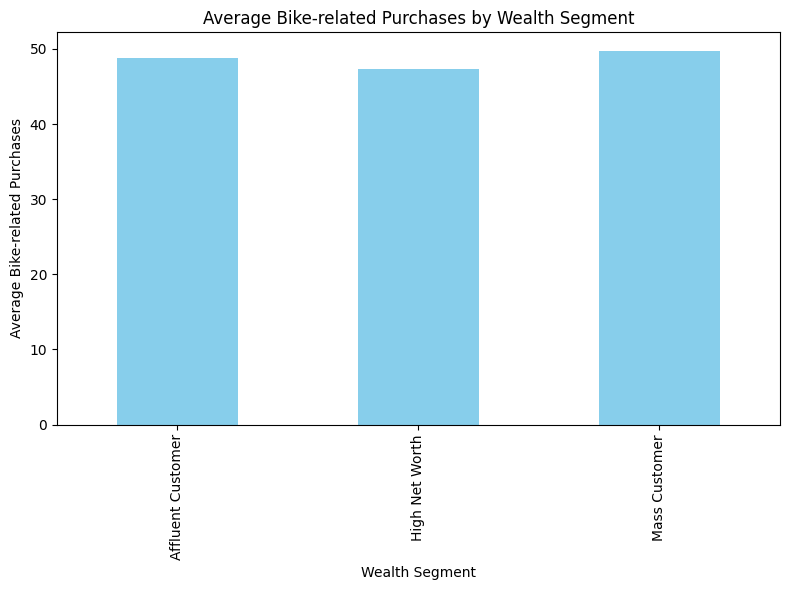

In [21]:
average_purchases = df.groupby('wealth_segment')['past_3_years_bike_related_purchases'].mean()

# Creating the bar chart
plt.figure(figsize=(8, 6))
average_purchases.plot(kind='bar', color='skyblue')
plt.title('Average Bike-related Purchases by Wealth Segment')
plt.xlabel('Wealth Segment')
plt.ylabel('Average Bike-related Purchases')

# Displaying the chart
plt.tight_layout()
plt.show()

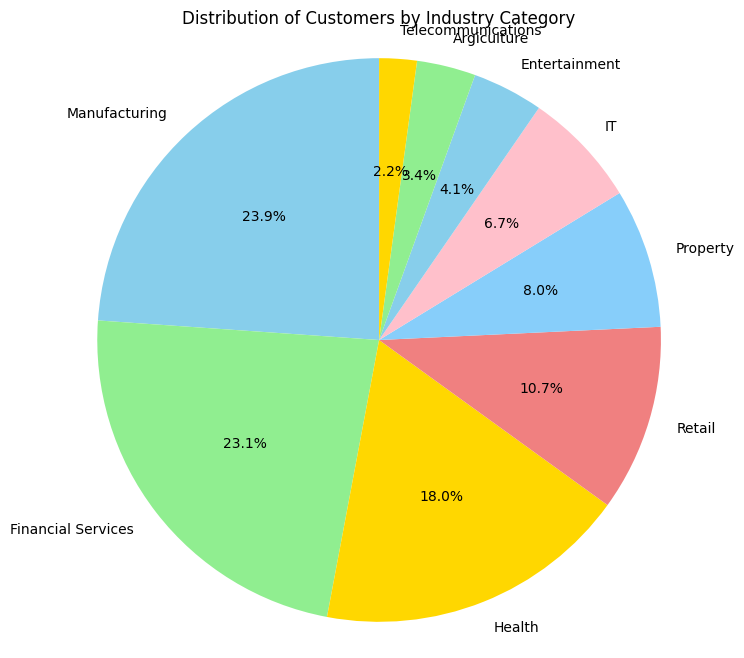

In [22]:


# Counting the number of customers in each industry category
customer_count = df['job_industry_category'].value_counts()

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(customer_count, labels=customer_count.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'gold', 'lightcoral', 'lightskyblue', 'pink'])
plt.title('Distribution of Customers by Industry Category')

# Displaying the chart
plt.axis('equal')
plt.show()


<Figure size 800x600 with 0 Axes>

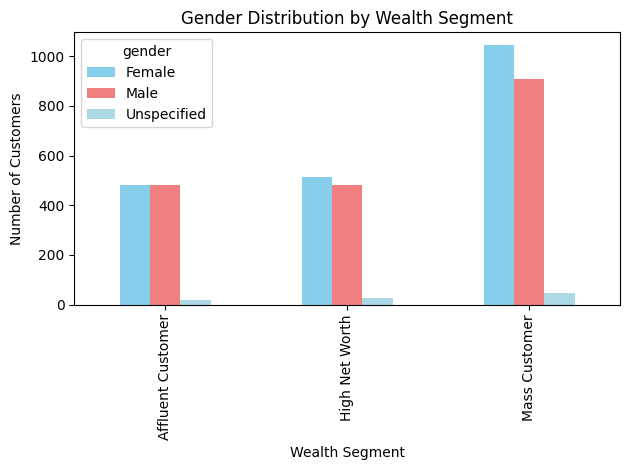

In [23]:
grouped_data = df.groupby(['wealth_segment', 'gender']).size().unstack()

# Creating the stacked bar chart
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral','lightblue'])
plt.title('Gender Distribution by Wealth Segment')
plt.xlabel('Wealth Segment')
plt.ylabel('Number of Customers')

# Displaying the chart
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

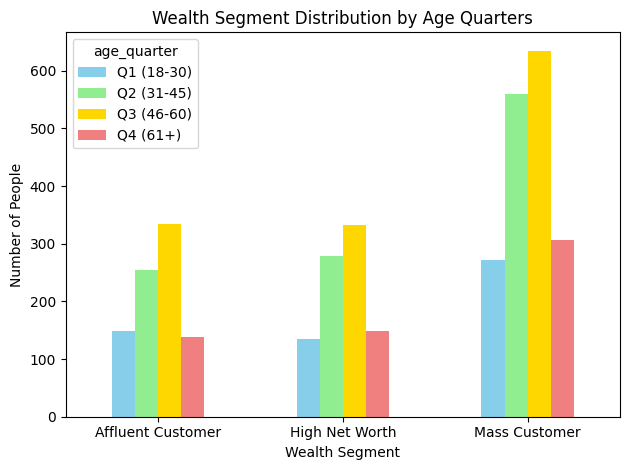

In [25]:
# Manually defining age ranges for each quarter
age_ranges = [(18, 30), (31, 45), (46, 60), (61, 100)]
labels = ['Q1 (18-30)', 'Q2 (31-45)', 'Q3 (46-60)', 'Q4 (61+)']

# Function to assign age quarter based on age range
def assign_age_quarter(age):
    for i, (lower, upper) in enumerate(age_ranges):
        if lower <= age <= upper:
            return labels[i]

df['age_quarter'] = df['age'].apply(assign_age_quarter)

# Grouping data by wealth segment and age quarter
grouped_data = df.groupby(['wealth_segment', 'age_quarter']).size().unstack()

# Creating the stacked bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=False, color=['skyblue', 'lightgreen', 'gold', 'lightcoral'])
plt.title('Wealth Segment Distribution by Age Quarters')
plt.xlabel('Wealth Segment')
plt.ylabel('Number of People')
plt.xticks(rotation=0)

# Displaying the chart
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

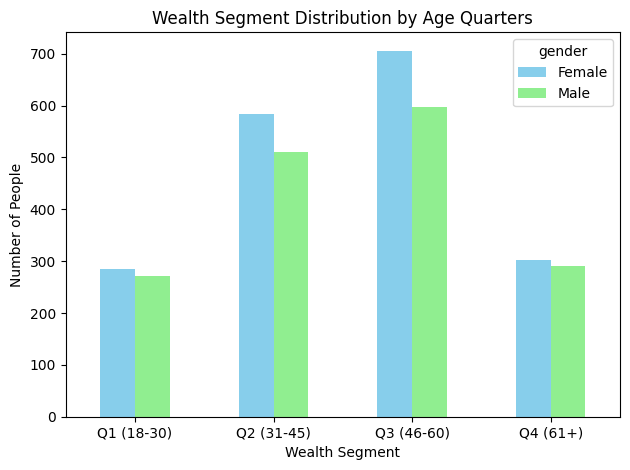

In [26]:
# Manually defining age ranges for each quarter
age_ranges = [(18, 30), (31, 45), (46, 60), (61, 100)]
labels = ['Q1 (18-30)', 'Q2 (31-45)', 'Q3 (46-60)', 'Q4 (61+)']

# Function to assign age quarter based on age range
def assign_age_quarter(age):
    for i, (lower, upper) in enumerate(age_ranges):
        if lower <= age <= upper:
            return labels[i]

df['age_quarter'] = df['age'].apply(assign_age_quarter)

# Grouping data by wealth segment and age quarter
grouped_data = df.groupby(['age_quarter','gender']).size().unstack()

# Creating the stacked bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=False, color=['skyblue', 'lightgreen', 'gold', 'lightcoral'])
plt.title('Wealth Segment Distribution by Age Quarters')
plt.xlabel('Wealth Segment')
plt.ylabel('Number of People')
plt.xticks(rotation=0)

# Displaying the chart
plt.tight_layout()
plt.show()

In [27]:
df = df.rename(columns={'past_3_years_bike_related_purchases': 'past_purchases'})

# Sorting the dataframe by bike-related purchases in descending order

df_sorted = df.sort_values(by='past_purchases', ascending=False)

# Selecting the top 5 high-value customers
top_customers = df_sorted.head(15)

# Creating a table-like plot to display top 5 high-value customers
plt.figure(figsize=(10, 6))
plt.axis('off')  # Turn off axis

# Create the table
table_data = []
for _, row in top_customers.iterrows():
    table_data.append([row['customer_id'], f"{row['first_name']} {row['last_name']}", row['wealth_segment'], row['gender'], row['job_industry_category'], row['past_purchases']])

plt.table(cellText=table_data, colLabels=top_customers.columns, cellLoc='center', loc='center', colColours=['#f5f5f5']*6)

# Save the table as an image (PNG format)
plt.savefig('C:/Users/Muhammed/Downloads/top_5_high_value_customers.png', bbox_inches='tight', pad_inches=0.5)
plt.close()